# EDA for Hotel Booking data

### 1. Data cleaning and preprocessing

In [3]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify  

In [4]:
df = pd.read_csv('Data//hotel_bookings.csv')

In [5]:
df.shape

(119390, 32)

In [6]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.isna().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [10]:
for i in df.columns:
    if df[i].isna().sum() !=0:
        print('Null values in', i, 'column:', df[i].isna().sum())

Null values in children column: 4
Null values in country column: 488
Null values in agent column: 16340
Null values in company column: 112593


In [11]:
len(df.index)

119390

In [12]:
#most rows do not contain company value -> the column will be dropped
df = df.drop(columns='company')

#total number of rows in comparison to the null values rows is not significant -> the null values will be dropped
df = df.dropna(subset=['children'])

#for country it will be assumed the missing values with the mode frequent values -> the null values will be filled with the most frequent variable
df.country.fillna(df['country'].mode()[0], inplace=True)

#for agent column will be filled with 9 for every null value.
df['agent'].fillna(0, inplace=True)

In [13]:
#replace TA/TO with undefined in distribution channel column
df['distribution_channel'].replace("TA/TO", "Undefined", inplace=True)

#replace Undefined,BB,FB,HB,SC to its meaning 
df['meal'].replace(['Undefined', 'BB', 'FB', 'HB', 'SC'],
                  ['No Meal', 'Breakfast', 'Full Board', 'Hald Board', 'No Meal'],
                  inplace=True)

In [14]:
#to turn column into "int" datatype
df['children'].astype(int)
df['agent'].astype(int)

#to turn column into datetime data type
pd.to_datetime(df['reservation_status_date'])

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 119386, dtype: datetime64[ns]

In [15]:
#to know number of duplicates
print('Duplicate values are:', df.duplicated().sum())

#to drop the duplicated rows
df.drop_duplicates(inplace=True)

Duplicate values are: 32020


In [16]:
#create total night column
df['total_night'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#convert month name to number then create new arrival date column by combining year, month, date
df['arrival_month'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month
df['arrival_date'] = pd.to_datetime(dict(year=df.arrival_date_year, month=df.arrival_month, day=df.arrival_date_day_of_month))

In [17]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_night,arrival_month,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,7,2015-07-01


In [36]:
df.to_csv("Data\processed_data.csv", index=False)

### 2. Data Visualization(EDA)

In [18]:
# Set style and context
sns.set_theme(style="whitegrid", context="notebook")
plt.figure(figsize=(12, 6))  

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

***Monthly Revenue Trends***

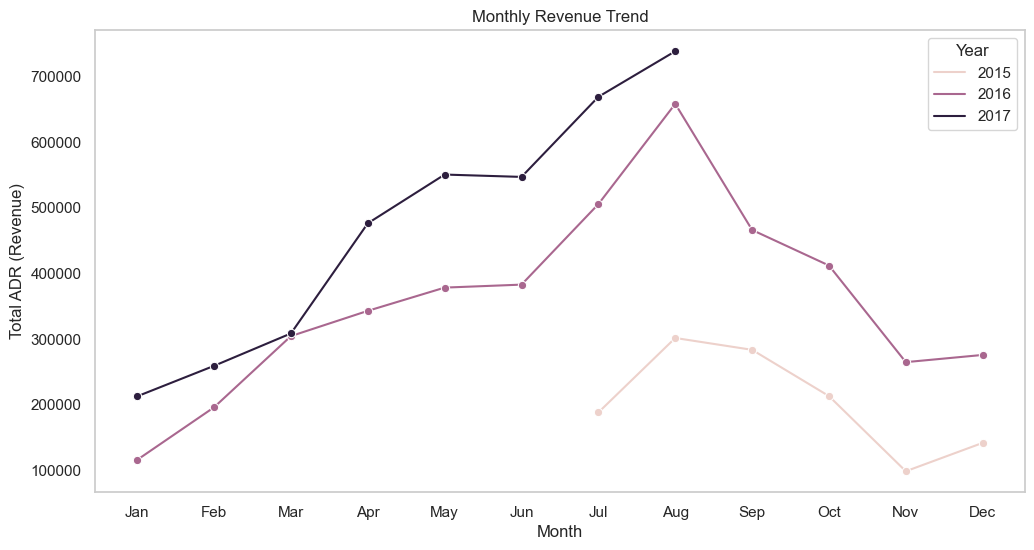

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate monthly revenue
monthly_revenue = df.groupby(['arrival_date_year', 'arrival_month'])['adr'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='arrival_month', y='adr', hue='arrival_date_year', data=monthly_revenue, marker='o')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total ADR (Revenue)')
plt.legend(title='Year')
plt.grid()
plt.show()


***Cancellations Over Time***

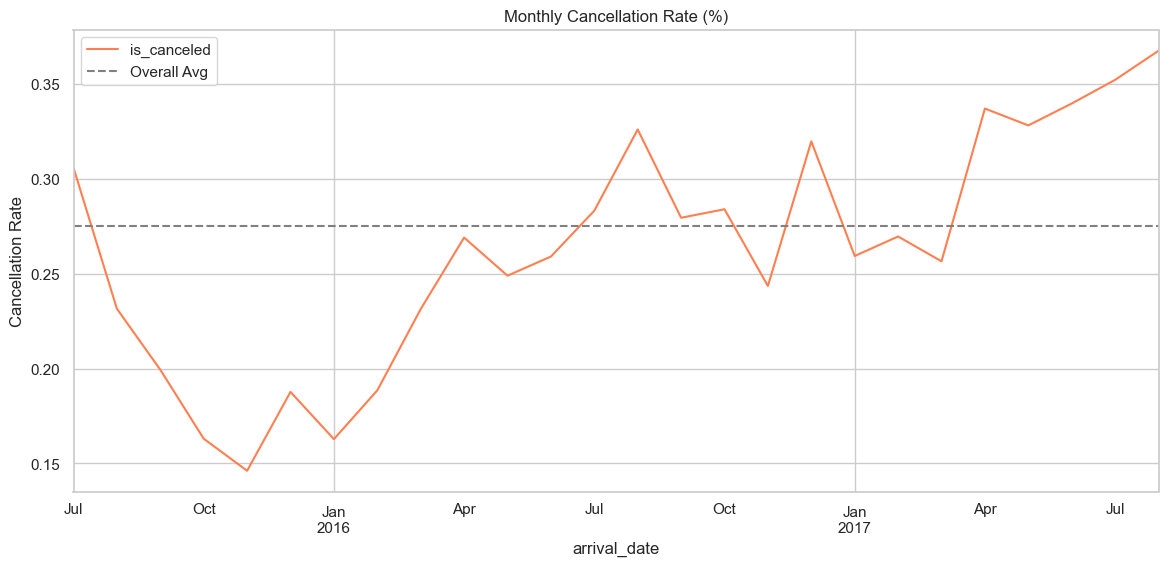

In [20]:
# Create a time series of cancellations
monthly_cancellations = df.resample('M', on='arrival_date')['is_canceled'].mean()

# Plot
plt.figure(figsize=(14, 6))
monthly_cancellations.plot(kind='line', color='coral')
plt.title("Monthly Cancellation Rate (%)")
plt.ylabel("Cancellation Rate")
plt.axhline(y=df['is_canceled'].mean(), color='gray', linestyle='--', label='Overall Avg')
plt.legend()
plt.show()


***Cancellation Rate by Hotel Type***

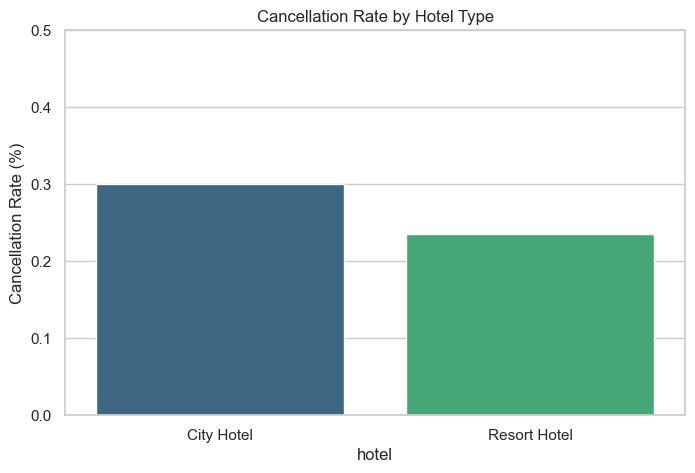

In [21]:
# Calculate cancellation rate by hotel
cancel_by_hotel = df.groupby('hotel')['is_canceled'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=cancel_by_hotel, x='hotel', y='is_canceled', palette='viridis')
plt.title("Cancellation Rate by Hotel Type")
plt.ylabel("Cancellation Rate (%)")
plt.ylim(0, 0.5)
plt.show()


***Lead Time vs. Cancellations***

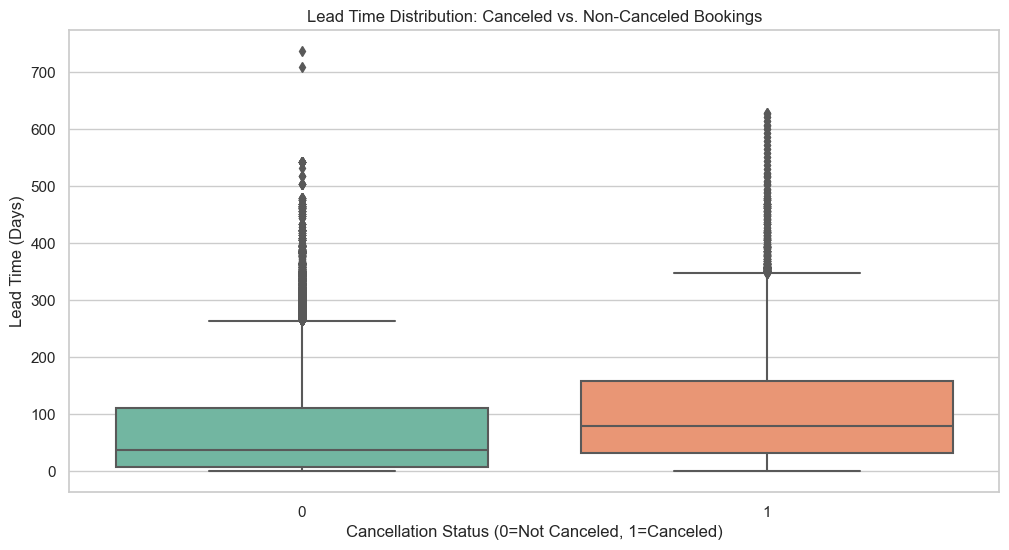

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='Set2', orient = 'v')
plt.title("Lead Time Distribution: Canceled vs. Non-Canceled Bookings")
plt.xlabel("Cancellation Status (0=Not Canceled, 1=Canceled)")
plt.ylabel("Lead Time (Days)")
plt.show()


***Geographical Analysis***

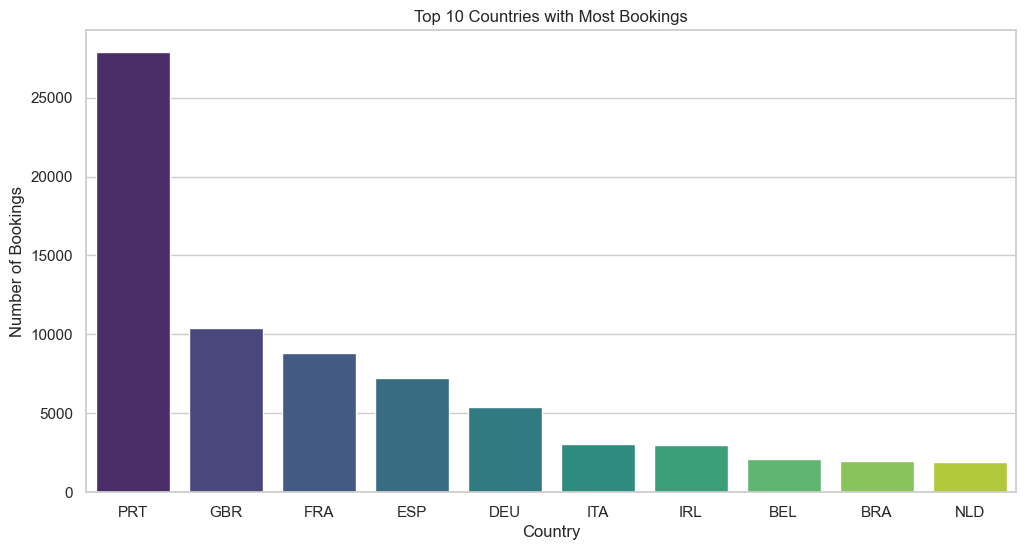

In [23]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries with Most Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.show()


***Global Booking Distribution***

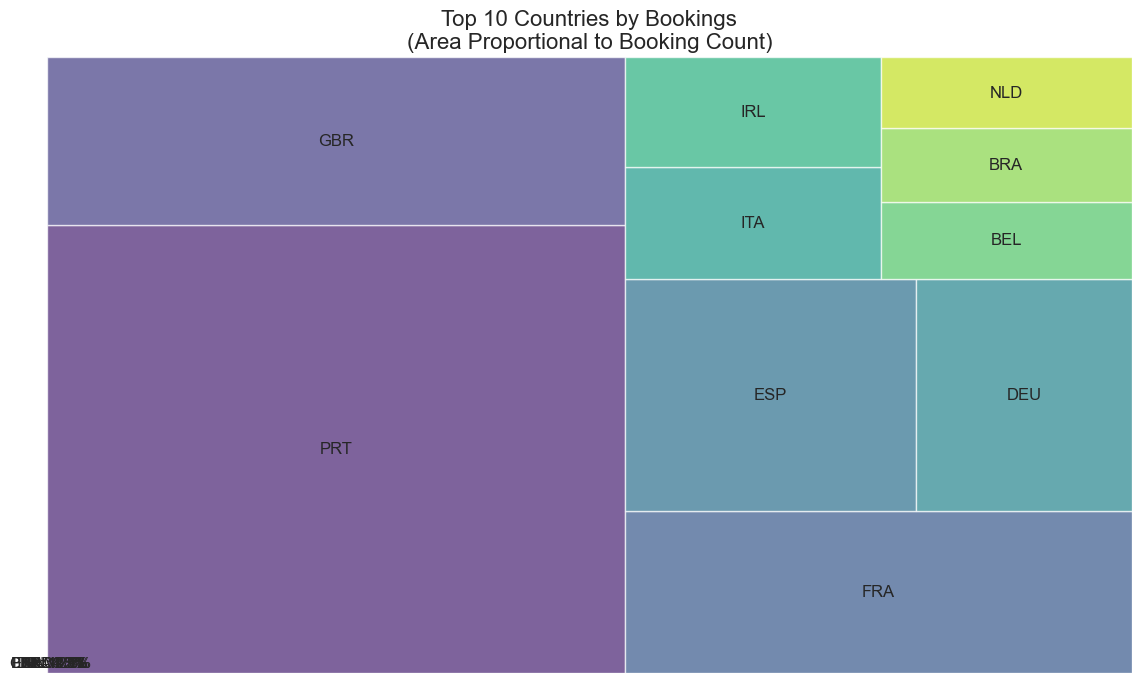

In [24]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=top_countries.values,
    label=top_countries.index,
    alpha=0.7,
    ec='white',  
    color=sns.color_palette("viridis", len(top_countries))  
)

plt.title("Top 10 Countries by Bookings\n(Area Proportional to Booking Count)", fontsize=16)
plt.axis('off')

for i, (country, count) in enumerate(top_countries.items()):
    plt.text(
        x=(i+0.5)/10,  
        y=0.95,
        s=f"{country}: {count/top_countries.sum():.1%}",
        fontsize=10,
        ha='center'
    )

plt.show()


***Stay Duration Distribution***

In [25]:
import plotly.express as px

# Aggregate bookings by country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country_code', 'bookings']

# Create choropleth map
fig = px.choropleth(country_counts,
                    locations="country_code",
                    color="bookings",
                    hover_name="country_code",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Global Booking Distribution")
fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


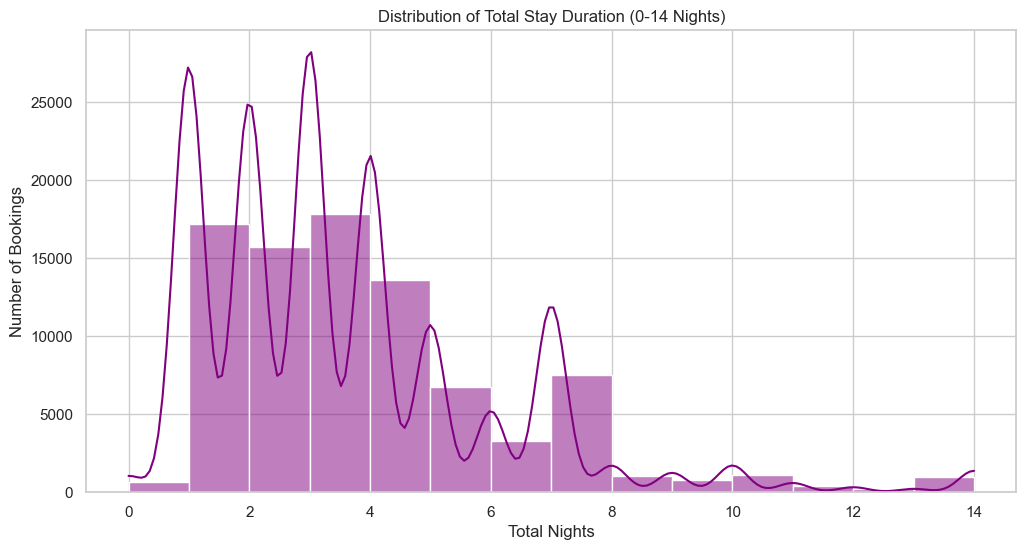

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['total_night'] <= 14]['total_night'], bins=14, kde=True, color='purple')
plt.title("Distribution of Total Stay Duration (0-14 Nights)")
plt.xlabel("Total Nights")
plt.ylabel("Number of Bookings")
plt.show()


***Meal Preferences***

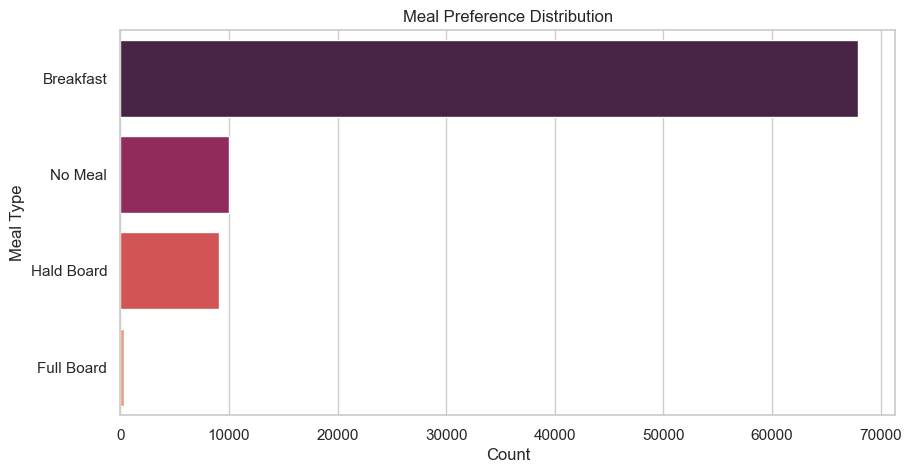

In [27]:
# Countplot for meal types
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='meal', order=df['meal'].value_counts().index, palette='rocket')
plt.title("Meal Preference Distribution")
plt.xlabel("Count")
plt.ylabel("Meal Type")
plt.show()


***Cancellations by Month and Year***

C:\Users\shiv\AppData\Roaming\Python\Python311\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



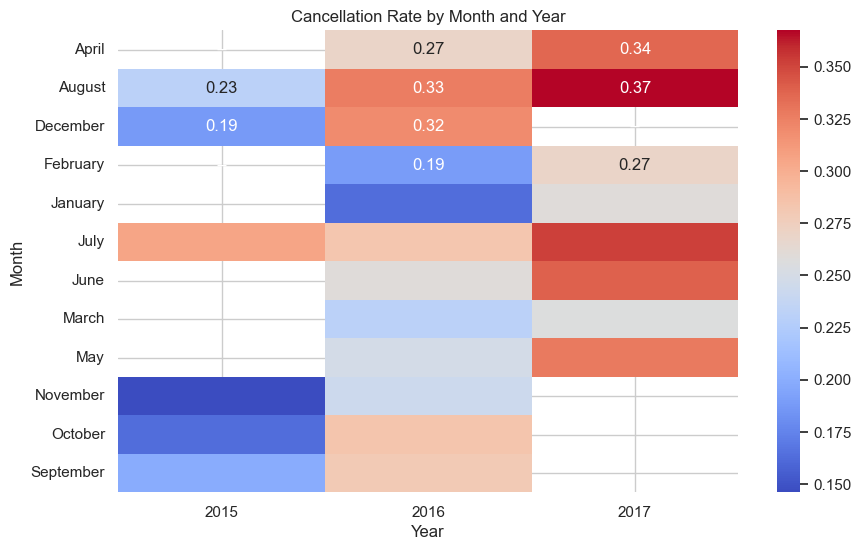

In [28]:
pivot_table = df.pivot_table(index='arrival_date_month', columns='arrival_date_year', values='is_canceled', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cancellation Rate by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


***Room Type Demand***

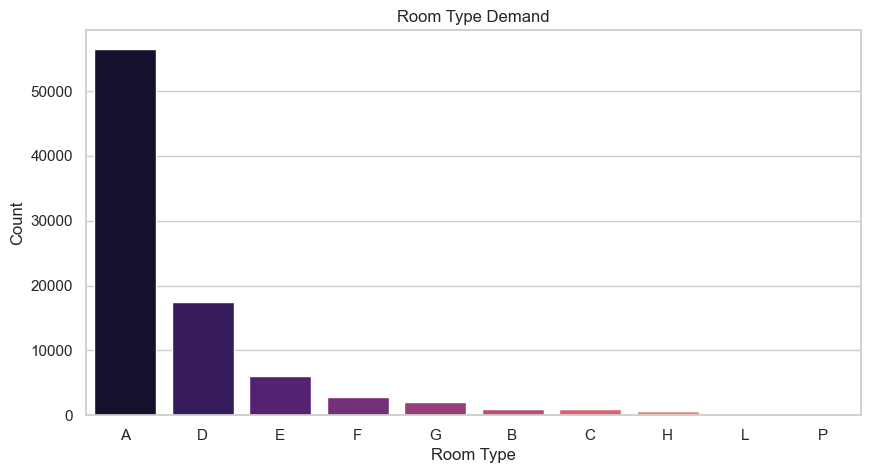

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='reserved_room_type', data=df, order=df['reserved_room_type'].value_counts().index, palette='magma')
plt.title('Room Type Demand')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


***Deposit Type Impact***

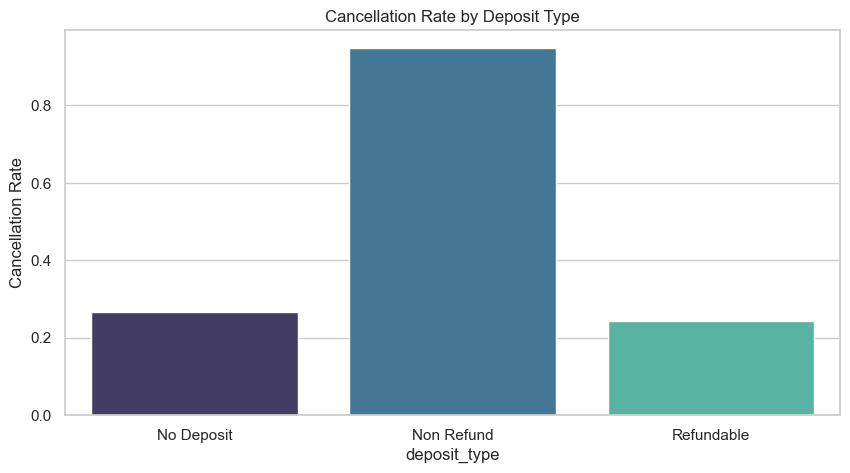

In [30]:
# Plot cancellation rate by deposit type
deposit_cancel = df.groupby('deposit_type')['is_canceled'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=deposit_cancel, x='deposit_type', y='is_canceled', palette='mako')
plt.title("Cancellation Rate by Deposit Type")
plt.ylabel("Cancellation Rate")
plt.show()


***Family vs Solo Travelers***

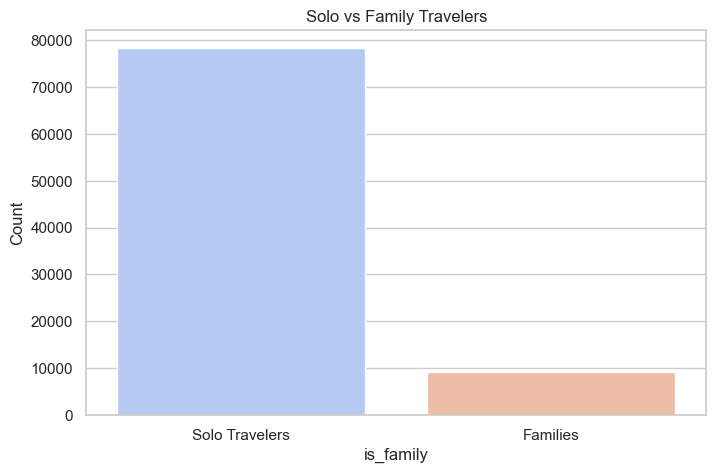

In [31]:
df['is_family'] = df['children'] + df['babies'] > 0  # If children/babies > 0, then family
plt.figure(figsize=(8, 5))
sns.countplot(x='is_family', data=df, palette='coolwarm')
plt.xticks([0, 1], ['Solo Travelers', 'Families'])
plt.title('Solo vs Family Travelers')
plt.ylabel('Count')
plt.show()


***Cancellation Patterns by Market Segment***

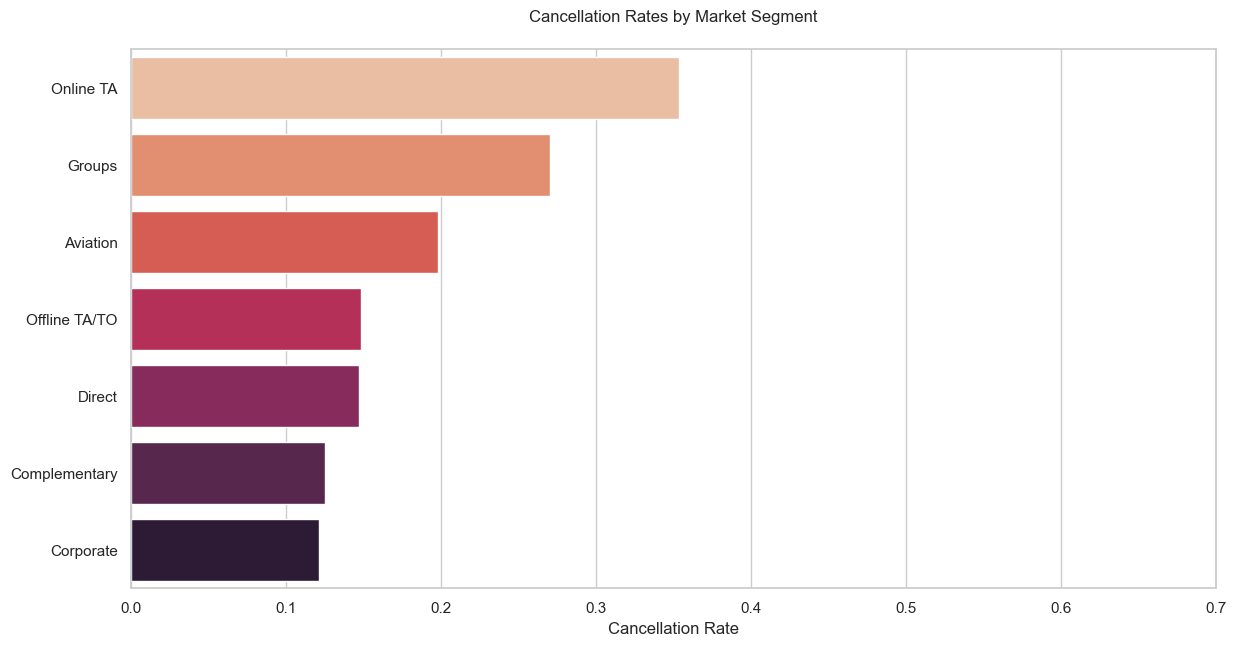

In [32]:
plt.figure(figsize=(14,7))
cancel_by_segment = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
sns.barplot(x=cancel_by_segment.values, y=cancel_by_segment.index, palette='rocket_r')
plt.title("Cancellation Rates by Market Segment", pad=20)
plt.xlabel("Cancellation Rate")
plt.ylabel("")
plt.xlim(0, 0.7)
plt.show()


***ADR Distribution by Customer Type***

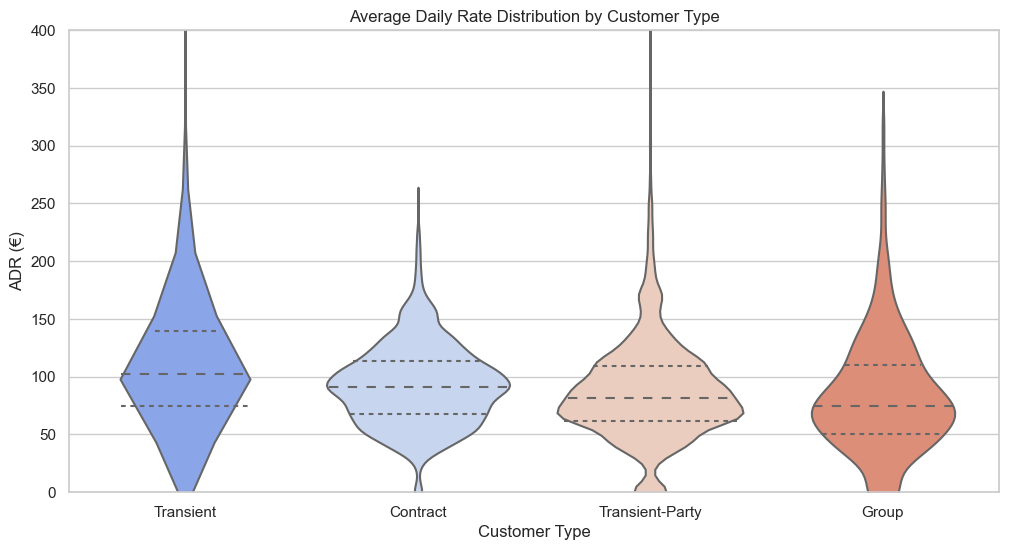

In [33]:
plt.figure(figsize=(12,6))
sns.violinplot(x='customer_type', y='adr', data=df, 
              palette='coolwarm', inner='quartile')
plt.title("Average Daily Rate Distribution by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("ADR (€)")
plt.ylim(0, 400)
plt.show()


***Booking Lead Time vs. Special Requests***

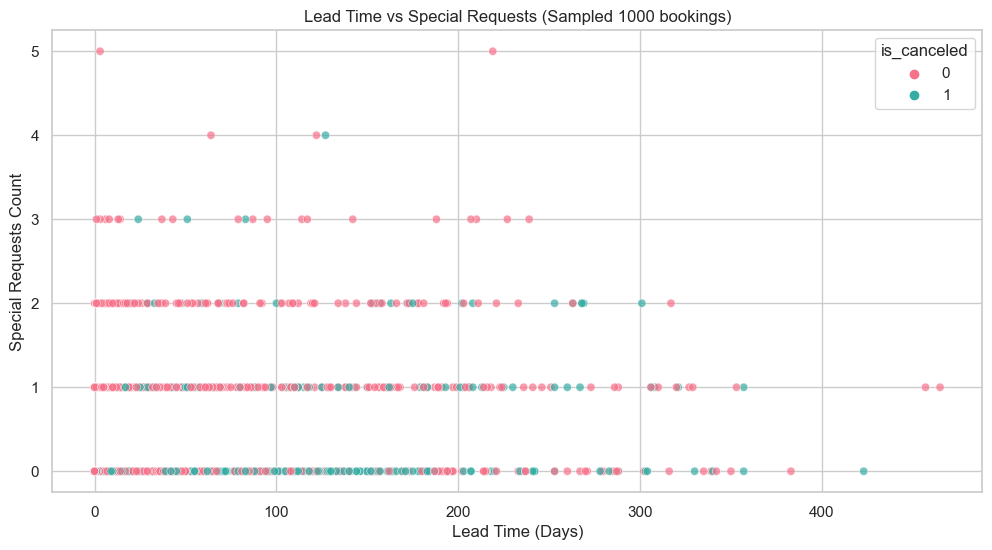

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='lead_time', y='total_of_special_requests', 
                hue='is_canceled', data=df.sample(1000),
                alpha=0.7, palette='husl')
plt.title("Lead Time vs Special Requests (Sampled 1000 bookings)")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Special Requests Count")
plt.show()


***Monthly Booking Trends***

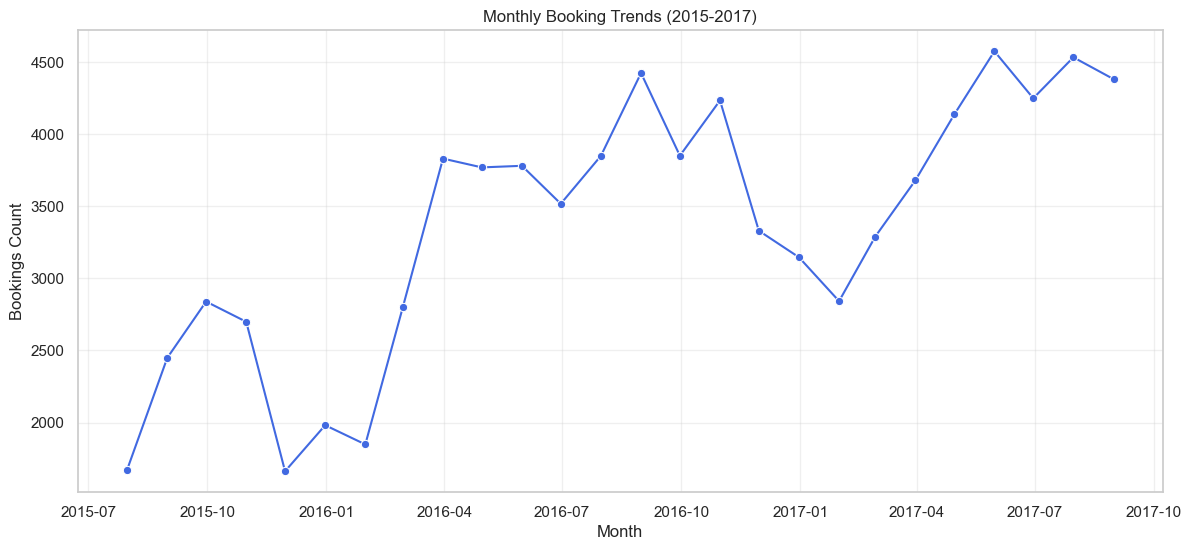

In [35]:
# Create monthly booking counts
monthly_bookings = df.resample('M', on='arrival_date').size()

plt.figure(figsize=(14,6))
sns.lineplot(x=monthly_bookings.index, y=monthly_bookings.values, 
             color='royalblue', marker='o')
plt.title("Monthly Booking Trends (2015-2017)")
plt.xlabel("Month")
plt.ylabel("Bookings Count")
plt.grid(True, alpha=0.3)
plt.show()
